In [62]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings("ignore")

In [75]:
reviews= pd.read_csv('IMDB-data\IMDB Dataset.csv')
reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [73]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [76]:
reviews['sentiment']= np.where(reviews['sentiment']=='positive', 1, 0)
reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [77]:
reviews['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [78]:
# Removing HTML tags using the BeautifulSoup module.
for i in range(len(reviews)):
    reviews['review'][i] = BeautifulSoup(reviews['review'][i]).get_text()
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [79]:
# Removing punctuation
for i in range(len(reviews)):
    reviews['review'][i] = re.sub("[^a-zA-Z]", ' ', reviews['review'][i])
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there s a family where a little boy ...,0
4,Petter Mattei s Love in the Time of Money is...,1


In [80]:
# converting into lowercase and splitting to eliminate stopwords
for i in range(len(reviews)):
    reviews['review'][i] = reviews['review'][i].lower()
    reviews['review'][i] = reviews['review'][i].split()

In [81]:
# setting stopwords and removing them
swords = set(stopwords.words("english"))

for i in range(len(reviews)):
    reviews['review'][i] = [w for w in reviews['review'][i] if w not in swords]               
    reviews['review'][i]= " ".join(reviews['review'][i])
reviews.head(3)

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1


In [82]:
# creating features and targets
X = reviews.drop('sentiment', axis=1)
y  = reviews["sentiment"]

In [83]:
X.head()

,review
0,one reviewers mentioned watching oz episode ho...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake thinks zombie...
4,petter mattei love time money visually stunnin...


In [84]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, shuffle = True, random_state = 25)

In [85]:
X_train.review.shape

(40000,)

In [86]:
# Using the countvectorizer to create a vector-model with a maximum of 10,000 words.
vect = CountVectorizer(max_features=10000)

In [87]:
# Converting train data to feature vector matrix
X_train_vect = vect.fit_transform(X_train.review)

In [88]:
X_train_vect.shape

(40000, 10000)

In [89]:
my_array = X_train_vect.toarray()
my_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
X_df= pd.DataFrame(my_array, columns=vect.get_feature_names())
X_df.shape

(40000, 10000)

In [91]:
y_train.shape[0]

40000

In [92]:
models = []
print(type(("Logistic Regression", LogisticRegression())))
models.append(("Gaussian Naive Bayes", GaussianNB()))
models.append(("Multinomial Naive Bayes", MultinomialNB()))
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Random Forest Classifier", RandomForestClassifier()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier()))
print(type(models)) # List
models

<class 'tuple'>
<class 'list'>


[('Gaussian Naive Bayes', GaussianNB()),
 ('Multinomial Naive Bayes', MultinomialNB()),
 ('Logistic Regression', LogisticRegression()),
 ('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier())]

In [93]:
X_test.head() 

,review
45198,two classic anti hero buddies headlong chase b...
47438,reasons taking documentary serious four reason...
44919,movie poorly acted jeff bridges accent horribl...
1551,would surprised told movie deals conspiracy to...
47127,doubt madonna guy ritchie married thought woul...


In [94]:
test_result = vect.transform(X_test['review'])
print(type(test_result), test_result.shape)
test_result

<class 'scipy.sparse.csr.csr_matrix'> (10000, 10000)


<10000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 868496 stored elements in Compressed Sparse Row format>

In [95]:
test_result = test_result.toarray() 
print(type(test_result), test_result.shape)

<class 'numpy.ndarray'> (10000, 10000)


In [96]:
for name, model in models:
    %time model.fit(X_df, y_train)
    test_pred = model.predict(test_result)
    print(name, "Accuracy Score :", accuracy_score(y_test, test_pred))
    print(name, "F1 Score :", f1_score(y_test, test_pred, average = "weighted"))
    print("---" * 10)

Wall time: 12.5 s
Gaussian Naive Bayes Accuracy Score : 0.7331
Gaussian Naive Bayes F1 Score : 0.7288289887805407
------------------------------
Wall time: 27.5 s
Multinomial Naive Bayes Accuracy Score : 0.8551
Multinomial Naive Bayes F1 Score : 0.8550984220218157
------------------------------
Wall time: 41.4 s
Logistic Regression Accuracy Score : 0.8758
Logistic Regression F1 Score : 0.8757931984355463
------------------------------
Wall time: 7min 6s
Random Forest Classifier Accuracy Score : 0.8507
Random Forest Classifier F1 Score : 0.8506981710525954
------------------------------
Wall time: 10min 20s
Decision Tree Classifier Accuracy Score : 0.7211
Decision Tree Classifier F1 Score : 0.7210758758525024
------------------------------


# Human-labelled Data

In [102]:
#import our labelled dataset

human_data = pd.read_csv('data/test_sample_data.csv')
human_data['sentiment']= np.where(human_data['sentiment']=='positive', 1, 0)
human_data.head(5)

,review,sentiment
0,Will no doubt delight Plympton 's legion of fa...,1
1,The pacing is often way off and there are too ...,0
2,Shows moments of promise but ultimately succum...,0
3,"Unless you are in dire need of a Diesel fix , ...",0
4,"Not everything works , but the average is high...",1


In [103]:
# Removing HTML tags using the BeautifulSoup module.
for i in range(len(human_data)):
    human_data['review'][i] = BeautifulSoup(human_data['review'][i]).get_text()
human_data.head()

,review,sentiment
0,Will no doubt delight Plympton 's legion of fa...,1
1,The pacing is often way off and there are too ...,0
2,Shows moments of promise but ultimately succum...,0
3,"Unless you are in dire need of a Diesel fix , ...",0
4,"Not everything works , but the average is high...",1


In [104]:
# Removing punctuation
for i in range(len(human_data)):
    human_data['review'][i] = re.sub("[^a-zA-Z]", ' ', human_data['review'][i])
human_data.head()

,review,sentiment
0,Will no doubt delight Plympton s legion of fa...,1
1,The pacing is often way off and there are too ...,0
2,Shows moments of promise but ultimately succum...,0
3,Unless you are in dire need of a Diesel fix ...,0
4,Not everything works but the average is high...,1


In [105]:
# converting into lowercase and splitting to eliminate stopwords
for i in range(len(human_data)):
    human_data['review'][i] = human_data['review'][i].lower()
    human_data['review'][i] = human_data['review'][i].split()

In [106]:
# setting stopwords and removing them
swords = set(stopwords.words("english"))

for i in range(len(human_data)):
    human_data['review'][i] = [w for w in human_data['review'][i] if w not in swords]               
    human_data['review'][i]= " ".join(human_data['review'][i])
human_data.head(3)

,review,sentiment
0,doubt delight plympton legion fans others may ...,1
1,pacing often way many bona fide groaners among...,0
2,shows moments promise ultimately succumbs clic...,0


In [107]:
# creating features and targets
X_hd = human_data.drop('sentiment', axis=1)
y_hd  = human_data["sentiment"]

In [108]:
human_result = vect.transform(X_hd['review'])
print(type(human_result), human_result.shape)
human_result

<class 'scipy.sparse.csr.csr_matrix'> (101, 10000)


<101x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 773 stored elements in Compressed Sparse Row format>

In [109]:
human_result = human_result.toarray() 
print(type(human_result), human_result.shape)

<class 'numpy.ndarray'> (101, 10000)


In [110]:
for name, model in models:
    %time model.fit(X_df, y_train)
    human_test_pred = model.predict(human_result)
    print(name, "Accuracy Score :", accuracy_score(y_hd, human_test_pred))
    print(name, "F1 Score :", f1_score(y_hd, human_test_pred, average = "weighted"))
    print("---" * 10)

Wall time: 6.31 s
Gaussian Naive Bayes Accuracy Score : 0.40594059405940597
Gaussian Naive Bayes F1 Score : 0.2854597136623232
------------------------------
Wall time: 24.7 s
Multinomial Naive Bayes Accuracy Score : 0.7128712871287128
Multinomial Naive Bayes F1 Score : 0.7105199968815779
------------------------------
Wall time: 38.5 s
Logistic Regression Accuracy Score : 0.7227722772277227
Logistic Regression F1 Score : 0.7239652653789969
------------------------------
Wall time: 6min 51s
Random Forest Classifier Accuracy Score : 0.6534653465346535
Random Forest Classifier F1 Score : 0.5837608970981132
------------------------------
Wall time: 10min 4s
Decision Tree Classifier Accuracy Score : 0.6138613861386139
Decision Tree Classifier F1 Score : 0.555185137356334
------------------------------


# Vader-labelled Data

In [111]:
#import our labelled dataset

vader_data = pd.read_csv('sentiment_data.csv')
vader_data['sentiment']= np.where(vader_data['sentiment']=='positive', 1, 0)
vader_data.head(5)

,review,sentiment
0,The Rock is destined to be the 21st Century 's...,1
1,The gorgeously elaborate continuation of `` Th...,1
2,Effective but too-tepid biopic,1
3,If you sometimes like to go to the movies to h...,1
4,"Emerges as something rare , an issue movie tha...",1


In [112]:
# Removing HTML tags using the BeautifulSoup module.
for i in range(len(vader_data)):
    vader_data['review'][i] = BeautifulSoup(vader_data['review'][i]).get_text()

In [113]:
for i in range(len(vader_data)):
    vader_data['review'][i] = re.sub("[^a-zA-Z]", ' ', vader_data['review'][i])

In [114]:
# converting into lowercase and splitting to eliminate stopwords
for i in range(len(vader_data)):
    vader_data['review'][i] = vader_data['review'][i].lower()
    vader_data['review'][i] = vader_data['review'][i].split()

In [115]:
for i in range(len(vader_data)):
    vader_data['review'][i] = [w for w in vader_data['review'][i] if w not in swords]               
    vader_data['review'][i]= " ".join(vader_data['review'][i])

In [116]:
# creating features and targets
X_vader = vader_data.drop('sentiment', axis=1)
y_vader  = vader_data["sentiment"]
X_vader['review']

0        rock destined st century new conan going make ...
1        gorgeously elaborate continuation lord rings t...
2                                   effective tepid biopic
3        sometimes like go movies fun wasabi good place...
4        emerges something rare issue movie honest keen...
                               ...                        
11850                                          real snooze
11851                                            surprises
11852    seen hippie turned yuppie plot enthusiastic ch...
11853    fans walked muttering words like horrible terr...
11854                                            case zero
Name: review, Length: 11855, dtype: object

In [117]:
vader_result = vect.transform(X_vader['review'])

In [118]:
vader_result = vader_result.toarray() 

In [119]:
for name, model in models:
    #%time model.fit(X_df, y_train)
    vader_test_pred = model.predict(vader_result)
    print(name, "Accuracy Score :", accuracy_score(y_vader, vader_test_pred))
    print(name, "F1 Score :", f1_score(y_vader, vader_test_pred, average = "weighted"))
    print("---" * 10)

Gaussian Naive Bayes Accuracy Score : 0.3183466891606917
Gaussian Naive Bayes F1 Score : 0.2147124748894012
------------------------------
Multinomial Naive Bayes Accuracy Score : 0.6282581189371573
Multinomial Naive Bayes F1 Score : 0.6449836078974778
------------------------------
Logistic Regression Accuracy Score : 0.6053142134120624
Logistic Regression F1 Score : 0.6242527029461534
------------------------------
Random Forest Classifier Accuracy Score : 0.724588781105019
Random Forest Classifier F1 Score : 0.6906707900891136
------------------------------
Decision Tree Classifier Accuracy Score : 0.6976803036693379
Decision Tree Classifier F1 Score : 0.6769321006073556
------------------------------


# Evaluating Models

For Training Data

[2 1 0]


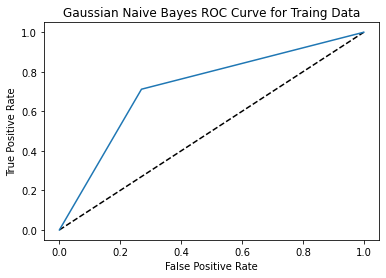

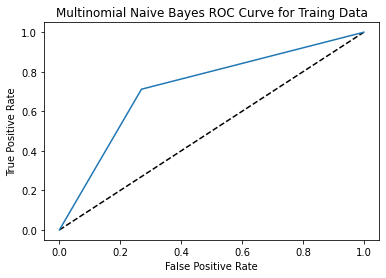

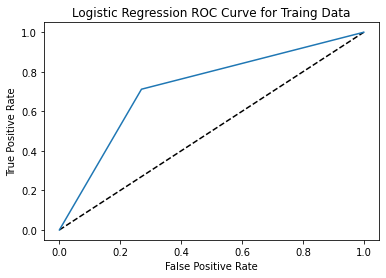

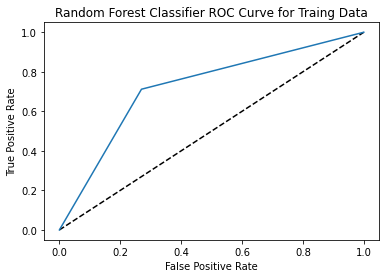

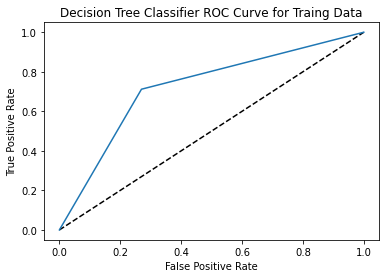

In [121]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
print(thresholds)

for name, model in models:
    plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name +' ROC Curve for Traing Data')
    plt.show()

For Vader-labelled Data

[2 1 0]


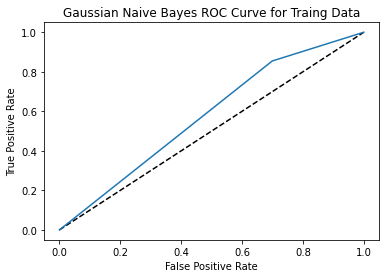

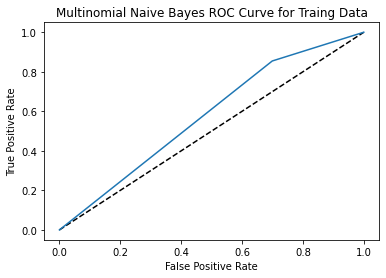

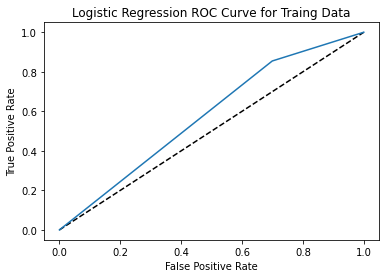

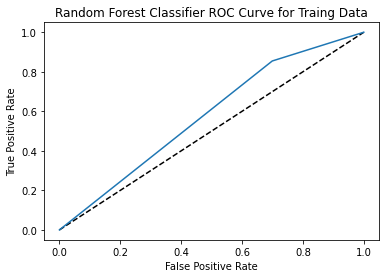

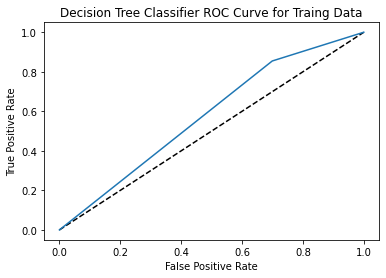

In [122]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_vader, vader_test_pred)
print(thresholds)

for name, model in models:
    plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name +' ROC Curve for Traing Data')
    plt.show()

For Human-labelled Data

[2 1 0]


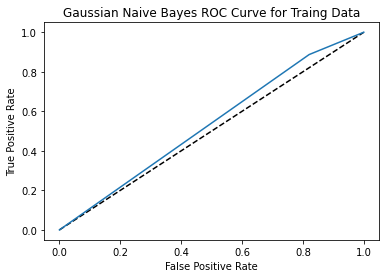

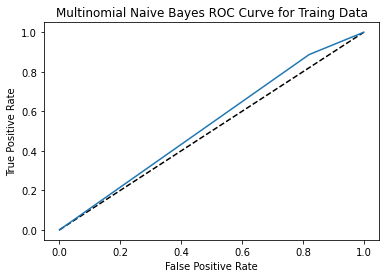

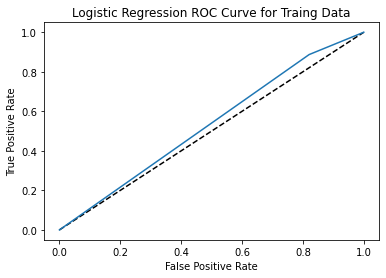

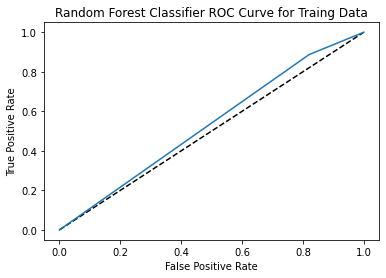

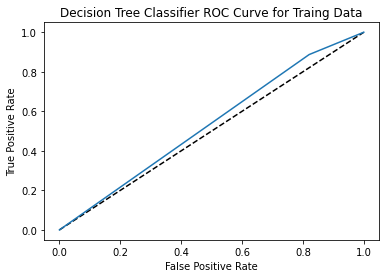

In [123]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_hd, human_test_pred)
print(thresholds)

for name, model in models:
    plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name +' ROC Curve for Traing Data')
    plt.show()